<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/ORIG_6b_SurveyDataAnalysisGESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Analysis of International Social Survey Data

This is a global public opinion data source that lends itself to all sorts of timely questions about religion and politics, among other topics. (The ISSP is an international equivalent to the GSS.) This is the kind of thing that you could do on the research project if you were interested in attitudes about science and technology (and could find an appropriate dataset).


In [ ]:
# Code block 1a: Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt


In [ ]:
# Code block 1b: Installing some libraries we'll need
!pip install pyreadstat
!pip install researchpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.3 MB/s eta 0:00:00


In [ ]:
# Code block 1c: Importing the new library
import researchpy as rp

You can download the data from the GESIS, https://search.gesis.org/research_data/ZA7570 and then copy the files to your Drive and read the data into your notebook.

Here's a link to the codebook: https://dbk.gesis.org/dbksearch/download.asp?id=69690

We'll use the codebook to find some variables of interest and then do some basic analysis and visualization.

Here's the pandas guide to the read method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_stata.html?highlight=read_stata


In [ ]:
# Code block 2: Reading in data
# The format of this data source is an Stata data file, .dta, so we installed a library--pyreadstat--that extends pandas
# by adding another read method, read_stata. We use this to read the file into a new data object.
# I mounted my Drive in this notebook and read the file by copying the local path.

ISSP2018_df = pd.read_stata('/content/drive/MyDrive/Data/ZA7570_v2-1-0.dta', convert_categoricals=False) #does not convert categorical

In [ ]:
ISSP2018_df.head()

,studyno,version,doi,country,c_sample,c_alphan,v1,v2,v3,v4,...,US_REG,ZA_REG,CASEID,SUBSCASE,DATEYR,DATEMO,DATEDY,WEIGHT,MODE,PARTIALS
0,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,3,3,0,3,...,0,0,2.018000e+15,0,2018,99,99,0.858149,20,1
1,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,1,1,0,4,...,0,0,2.018000e+15,0,2018,99,99,0.543920,20,1
2,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,1,1,0,4,...,0,0,2.018000e+15,0,2018,99,99,0.858149,20,1
3,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,2,2,0,1,...,0,0,2.018000e+15,0,2018,99,99,1.298201,20,1
4,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,2,1,0,8,...,0,0,2.018000e+15,0,2018,99,99,3.069912,20,1


In [ ]:
ISSP2018_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46267 entries, 0 to 46266
Data columns (total 492 columns):
 #    Column    Dtype  
---   ------    -----  
 0    studyno   int16  
 1    version   object 
 2    doi       object 
 3    country   int16  
 4    c_sample  int32  
 5    c_alphan  object 
 6    v1        int8   
 7    v2        int8   
 8    v3        int8   
 9    v4        int8   
 10   v5        int8   
 11   v6        int8   
 12   v7        int8   
 13   v8        int8   
 14   v9        int8   
 15   v10       int8   
 16   v11       int8   
 17   v12       int8   
 18   v13       int8   
 19   v14       int8   
 20   v15       int8   
 21   v16       int8   
 22   v17       int8   
 23   v18       int8   
 24   v19       int8   
 25   v20       int8   
 26   v21       int8   
 27   v22       int8   
 28   v23       int8   
 29   v24       int8   
 30   v25       int8   
 31   v26       int8   
 32   v27       int8   
 33   v28       int8   
 34   v29       int8   
 3

In [ ]:
# Code block 3: Inspecting variables
# I've found a relationship between variables that I want to examine: does belief about
# the human causes of climate change vary by political party.

ISSP2018_df['v1']

0        3
1        1
2        1
3        2
4        2
        ..
46262    2
46263    1
46264    1
46265    2
46266    3
Name: v1, Length: 46267, dtype: int8

In [ ]:
# Recode the variable to exclude missing cases
ISSP2018_df['v1r'] = np.where(ISSP2018_df['v1'] > 4, np.nan, ISSP2018_df['v1'])
ISSP2018_df['v1r']

0        3.0
1        1.0
2        1.0
3        2.0
4        2.0
        ... 
46262    2.0
46263    1.0
46264    1.0
46265    2.0
46266    3.0
Name: v1r, Length: 46267, dtype: float64

In [ ]:
ISSP2018_df['SEX']

0        1
1        1
2        1
3        1
4        1
        ..
46262    2
46263    2
46264    2
46265    2
46266    2
Name: SEX, Length: 46267, dtype: int8

In [ ]:
# Recode the variable to exclude missing cases
ISSP2018_df['SEXr'] = np.where(ISSP2018_df['SEX'] > 2, np.nan, ISSP2018_df['SEX'])
ISSP2018_df['SEXr']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
46262    2.0
46263    2.0
46264    2.0
46265    2.0
46266    2.0
Name: SEXr, Length: 46267, dtype: float64

In [ ]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(ISSP2018_df.v1r, ISSP2018_df.SEXr, prop='col', test='chi-square')
crosstab


SEXr                
SEXr     1.0     2.0     All
v1r                         
1.0    22.41   22.51   22.47
2.0    61.13   60.73   60.92
3.0    13.78   14.08   13.94
4.0     2.67    2.68    2.68
All   100.00  100.00  100.00

In [ ]:
print(sigtab)

                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    1.0386
1                    p-value =    0.7919
2                 Cramer's V =    0.0048


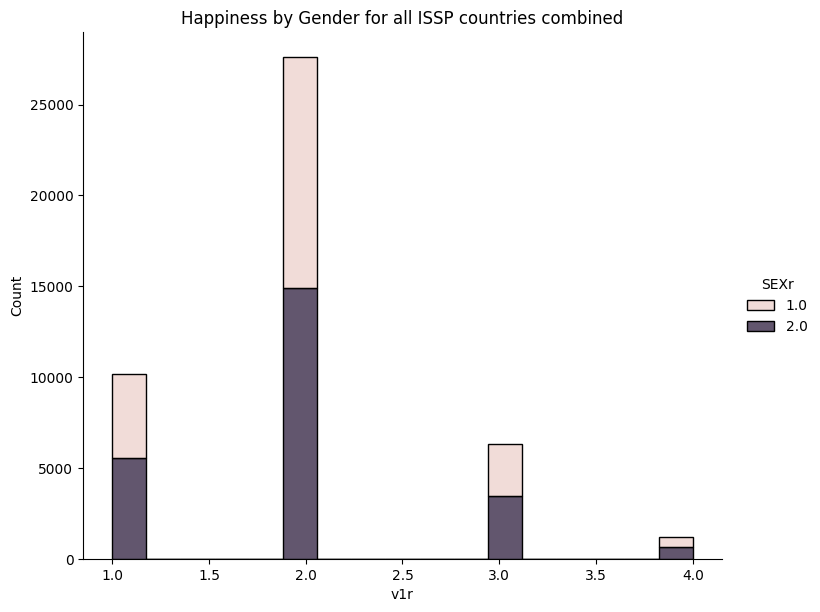

In [ ]:
p = sb.displot(ISSP2018_df, x='v1r', hue='SEXr', multiple="stack", height=6, aspect=1.25)
plt.title('Happiness by Gender for all ISSP countries combined')
plt.show()

## Activity

1. Download a ISSP data file from the GESIS. Copy the file to your Drive and read it into a data object.
2. Identify a dependent variable to explain.
3. Create one analysis and visualization related to your DV.
4. Sketch out a data story, keeping in mind the principles of DF.